<a href="https://colab.research.google.com/github/radanim/TIL/blob/master/lstm_%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
train_path="/content/drive/MyDrive/LSTM 모델링/train 01/RUN-001.csv"
test_path="/content/drive/MyDrive/dataset/RUN-001_test.csv"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional
df_train=pd.read_csv(train_path)
df_test=pd.read_csv(test_path)

In [3]:
df_train.head()

,TIME,PPS,TCRHOT,MH2CR1,ZWV,PPSTRB(3),"MFPWB(2,3)",WSPTA,WESFCL,XCNDB(1),MCMTB(1),TCMB(1),TCMIB(1),FREL(1),FREL(2)
0,0.000000,1.553135e+07,988.374430,0.0,6.71237,10497.684600,0.0,0.0,0.0,0.0,0.0,300.0,300.0,0.0,0.0
1,0.001000,1.553164e+07,988.374430,0.0,6.71237,10497.686728,0.0,0.0,0.0,0.0,0.0,300.0,300.0,0.0,0.0
2,300.098525,1.374299e+07,589.749630,0.0,6.71237,10610.922523,0.0,0.0,0.0,0.0,0.0,300.0,300.0,0.0,0.0
3,600.098525,1.330853e+07,584.539460,0.0,6.71237,10637.030370,0.0,0.0,0.0,0.0,0.0,300.0,300.0,0.0,0.0
4,900.098525,1.309044e+07,580.881991,0.0,6.71237,10647.300461,0.0,0.0,0.0,0.0,0.0,300.0,300.0,0.0,0.0


In [4]:
df_test.head()

,TIME,PPS,TCRHOT,MH2CR1,ZWV,PPSTRB(3),"MFPWB(2,3)",WSPTA,WESFCL,XCNDB(1),MCMTB(1),TCMB(1),TCMIB(1),FREL(1),FREL(2)
0,0.00000,15531344.0,988.37156,0.0,6.71237,10497.685,0.0,0.0,0.0,0.0,0.0,300.0,300.0,0.0,0.0
1,0.00100,15534223.0,988.37156,0.0,6.71237,10497.687,0.0,0.0,0.0,0.0,0.0,300.0,300.0,0.0,0.0
2,300.09852,14714246.0,585.05062,0.0,6.71237,10607.187,0.0,0.0,0.0,0.0,0.0,300.0,300.0,0.0,0.0
3,600.09852,14745930.0,583.71887,0.0,6.71237,10631.537,0.0,0.0,0.0,0.0,0.0,300.0,300.0,0.0,0.0
4,900.09852,14788842.0,583.05977,0.0,6.71237,10641.417,0.0,0.0,0.0,0.0,0.0,300.0,300.0,0.0,0.0


In [5]:
df_train.shape,df_test.shape

((1076, 15), (888, 15))

In [6]:
dfx = df_train.drop(columns ="FREL(2)")
dfy = df_train["FREL(2)"]
dfx.shape, dfy.shape

((1076, 14), (1076,))

In [7]:
df_train.tail()

,TIME,PPS,TCRHOT,MH2CR1,ZWV,PPSTRB(3),"MFPWB(2,3)",WSPTA,WESFCL,XCNDB(1),MCMTB(1),TCMB(1),TCMIB(1),FREL(1),FREL(2)
1071,321487.720099,278310.315048,100.0,108.330616,4.312400,21266.333103,0.000002,171.480895,0.0,2.317669,750520.366179,370.119950,410.327498,0.004346,0.000047
1072,321788.537966,278135.425426,100.0,108.330616,4.535665,21184.360080,0.000002,171.497192,0.0,2.317669,750520.366179,369.985221,410.312020,0.004351,0.000047
1073,322089.382649,277999.821243,100.0,108.330616,4.309454,21103.305550,0.000002,171.513331,0.0,2.317669,750520.366179,369.851542,410.296111,0.004355,0.000047
1074,322390.074890,277826.113225,100.0,108.330616,4.520843,21037.116768,0.000003,171.529308,0.0,2.317669,750520.366179,369.719003,410.280974,0.004360,0.000047
1075,322630.432005,277731.507039,100.0,108.330616,4.302035,20976.149013,0.000002,171.541975,0.0,2.317669,750520.366179,369.614893,410.269200,0.004364,0.000047


In [8]:
df_test.tail()

,TIME,PPS,TCRHOT,MH2CR1,ZWV,PPSTRB(3),"MFPWB(2,3)",WSPTA,WESFCL,XCNDB(1),MCMTB(1),TCMB(1),TCMIB(1),FREL(1),FREL(2)
883,264701.60,137339.71,2262.4162,277.65574,6.71237,12018.207,0.000004,187.80320,98.983706,0.0,0.0,300.0,300.0,0.001303,0.000002
884,265001.70,136298.03,2261.5105,277.65574,6.71237,12015.111,0.000004,187.80422,98.983946,0.0,0.0,300.0,300.0,0.001304,0.000002
885,265301.71,136156.88,2260.5958,277.65574,6.71237,12012.456,0.000006,187.80608,98.984897,0.0,0.0,300.0,300.0,0.001306,0.000002
886,265601.78,136198.89,2259.6870,277.65574,6.71237,12004.733,0.000006,187.80939,98.986654,0.0,0.0,300.0,300.0,0.001307,0.000002
887,265863.66,141512.82,2258.8968,277.65574,6.71237,11997.538,0.000009,187.81426,98.990758,0.0,0.0,300.0,300.0,0.001308,0.000002


In [9]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# 복원을 위해 x, y 따로 스케일링하기
# 스케일링 후 list 형태로 변환하기
mms = MinMaxScaler()
x = mms.fit_transform(dfx).tolist()
y = mms.fit_transform(dfy.to_frame()).tolist()

In [10]:
len(x[0]), len(y[0])
# (1075, 14)      (1075, 1)

(14, 1)

In [11]:
window_size = 10 
len(y) - window_size

1066

In [12]:
# window_size 만큼만 슬라이싱
# 10개 단위 데이터로 다음 y값을 예측
# 다음 y값(i+windows_size)은 포함되지 않도록 X값을 만들기
window_size = 10 
x_data = []
y_data = []

for i in range(len(y) - window_size):
    _x = x[i : i+window_size]
    _y = y[i + window_size]
    x_data.append(_x)
    y_data.append(_y)

In [13]:
len(x_data), len(y_data)

(1066, 1066)

In [14]:
# 8:2 로 나누기
split_size = int(len(x_data) * 0.8)
split_size

852

In [15]:
X_train = np.array(x_data[:split_size]) # 80
y_train = np.array(y_data[:split_size]) #80
X_valid = np.array(x_data[split_size:]) # 20
y_valid = np.array(y_data[split_size:]) #20

In [16]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((852, 10, 14), (852, 1), (214, 10, 14), (214, 1))

In [17]:
data_size = dfx.shape[1]
data_size

14

In [18]:
# 모델 생성

data_size = dfx.shape[1]

model = Sequential()
model.add(LSTM(units=10, activation='relu', return_sequences=True,input_shape=(window_size, data_size)))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(units=10, activation='relu')))
model.add(Dropout(0.1))
model.add(Dense(units=1)) # 분류를 하기 위한 학습
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 10)            1000      
                                                                 
 dropout (Dropout)           (None, 10, 10)            0         
                                                                 
 bidirectional (Bidirectiona  (None, 20)               1680      
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 2,701
Trainable params: 2,701
Non-trainable params: 0
______________________________________________________

In [19]:
model.compile(optimizer='adam',loss='mse',metrics=['mse','mae'])

In [20]:
X_train.shape, y_train.shape

((852, 10, 14), (852, 1))

In [21]:
history = model.fit(X_train, y_train, epochs = 100, validation_split = 0.2, batch_size=30, verbose=1) #verbose, callbacks 추가 서치 요망 

Epoch 1/100
23/23 [==============================] - 11s 93ms/step - loss: 0.1056 - mse: 0.1056 - mae: 0.2430 - val_loss: 0.0974 - val_mse: 0.0974 - val_mae: 0.3117
Epoch 2/100
23/23 [==============================] - 1s 24ms/step - loss: 0.0266 - mse: 0.0266 - mae: 0.1104 - val_loss: 0.1688 - val_mse: 0.1688 - val_mae: 0.4107
Epoch 3/100
23/23 [==============================] - 1s 33ms/step - loss: 0.0177 - mse: 0.0177 - mae: 0.0921 - val_loss: 0.0985 - val_mse: 0.0985 - val_mae: 0.3135
Epoch 4/100
23/23 [==============================] - 1s 38ms/step - loss: 0.0143 - mse: 0.0143 - mae: 0.0816 - val_loss: 0.0889 - val_mse: 0.0889 - val_mae: 0.2980
Epoch 5/100
23/23 [==============================] - 1s 32ms/step - loss: 0.0102 - mse: 0.0102 - mae: 0.0705 - val_loss: 0.0774 - val_mse: 0.0774 - val_mae: 0.2779
Epoch 6/100
23/23 [==============================] - 1s 34ms/step - loss: 0.0083 - mse: 0.0083 - mae: 0.0645 - val_loss: 0.0733 - val_mse: 0.0733 - val_mae: 0.2706
Epoch 7/100
23/

In [22]:
df_hist = pd.DataFrame(history.history)

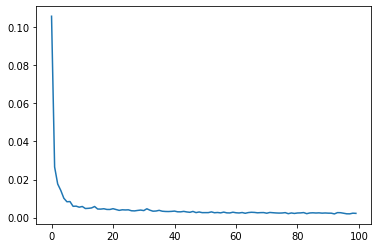

In [23]:
df_hist['loss'].plot()

In [24]:
y_pred = model.predict(X_train)

27/27 [==============================] - 1s 3ms/step


In [25]:
#rmse
np.sqrt(np.square(y_test-y_pred).mean())

NameError: ignored

In [ ]:
y_test.shape, y_pred.shape

In [ ]:
plt.figure(figsize= (12, 4))
plt.plot(y_test.flatten(), label='y_test')
plt.plot(y_pred.flatten(), label='y_pred')
plt.legend()

In [ ]:
y_predict_inverse = mmsy.inverse_transform(y_pred)
y_predict_inverse[:5]

In [ ]:
y_test_inverse = mmsy.inverse_transform(y_test)
y_test_inverse[:5
]

In [ ]:
# rmse 
np.sqrt(np.square(y_test_inverse-y_predict_inverse).mean())

In [ ]:
# 시각화
plt.figure(figsize = (12, 3))
plt.plot(y_predict_inverse)
plt.plot(y_test_inverse)